In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.float_format',lambda x: '{: .2f}'.format(x)) #decimal value upto 2 places
np.set_printoptions(suppress=True) #removes scientific notation
pd.set_option("display.max_columns",None) #scroll bar
pd.set_option("display.width",2000) # scroll bar

In [3]:
df_customers = pd.read_csv('customers.csv')
df_loans = pd.read_csv('loans.csv')
df_bureau = pd.read_csv('bureau_data.csv')

In [4]:
print(df_customers.shape,df_loans.shape,df_bureau.shape)

(50000, 12) (50000, 15) (50000, 8)


In [5]:
print(df_customers.head(5),"\n")
print(df_loans.head(5),"\n")
print(df_bureau.head(5))

  cust_id  age gender marital_status employment_status   income  number_of_dependants residence_type  years_at_current_address       city        state  zipcode
0  C00001   44      M        Married     Self-Employed  2586000                     3          Owned                        27      Delhi        Delhi   110001
1  C00002   38      M        Married          Salaried  1206000                     3          Owned                         4    Chennai   Tamil Nadu   600001
2  C00003   46      F        Married     Self-Employed  2878000                     3          Owned                        24    Kolkata  West Bengal   700001
3  C00004   55      F         Single     Self-Employed  3547000                     1          Owned                        15  Bangalore    Karnataka   560001
4  C00005   37      M        Married          Salaried  3432000                     3          Owned                        28       Pune  Maharashtra   411001 

  loan_id cust_id loan_purpose  loan_t

In [6]:
#unite 3 datas on basis of cust_id

df=pd.merge(df_customers,df_loans,on='cust_id')
df=pd.merge(df,df_bureau,on='cust_id')

print(df.head(7))
print(df.shape)

  cust_id  age gender marital_status employment_status   income  number_of_dependants residence_type  years_at_current_address       city        state  zipcode loan_id loan_purpose  loan_type  sanction_amount  loan_amount  processing_fee     gst  net_disbursement  loan_tenure_months  principal_outstanding  bank_balance_at_application disbursal_date installment_start_dt  default  number_of_open_accounts  number_of_closed_accounts  total_loan_months  delinquent_months  total_dpd  enquiry_count  credit_utilization_ratio
0  C00001   44      M        Married     Self-Employed  2586000                     3          Owned                        27      Delhi        Delhi   110001  L00001         Auto    Secured          3004000      2467000        49340.00  444060           1973600                  33                1630408                       873386     2019-07-24           2019-08-10    False                        1                          1                 42                  0       

In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   cust_id                      50000 non-null  object 
 1   age                          50000 non-null  int64  
 2   gender                       50000 non-null  object 
 3   marital_status               50000 non-null  object 
 4   employment_status            50000 non-null  object 
 5   income                       50000 non-null  int64  
 6   number_of_dependants         50000 non-null  int64  
 7   residence_type               49938 non-null  object 
 8   years_at_current_address     50000 non-null  int64  
 9   city                         50000 non-null  object 
 10  state                        50000 non-null  object 
 11  zipcode                      50000 non-null  int64  
 12  loan_id                      50000 non-null  object 
 13  loan_purpose    

In [8]:
df['default']=df['default'].astype(int)
print(df.default.value_counts())

default
0    45703
1     4297
Name: count, dtype: int64


In [9]:
X=df.drop('default',axis=1)
y=df['default']

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.25,random_state=42)

df_train = pd.concat([Xtrain,ytrain],axis='columns')
df_test = pd.concat([Xtest,ytest],axis='columns')


In [10]:
print(df_train.shape,df_test.shape)
print(df_train.head(5))

(37500, 33) (12500, 33)
      cust_id  age gender marital_status employment_status   income  number_of_dependants residence_type  years_at_current_address       city          state  zipcode loan_id loan_purpose  loan_type  sanction_amount  loan_amount  processing_fee     gst  net_disbursement  loan_tenure_months  principal_outstanding  bank_balance_at_application disbursal_date installment_start_dt  number_of_open_accounts  number_of_closed_accounts  total_loan_months  delinquent_months  total_dpd  enquiry_count  credit_utilization_ratio  default
27434  C27435   45      F         Single          Salaried  1131000                     0          Owned                         5  Ahmedabad        Gujarat   380001  L27435         Home    Secured          3458000      3276000        65520.00  589680           2620800                  24                 905176                       566117     2022-04-21           2022-05-21                        4                          2                 9

In [11]:
print(df_train.isna().sum())


cust_id                         0
age                             0
gender                          0
marital_status                  0
employment_status               0
income                          0
number_of_dependants            0
residence_type                 48
years_at_current_address        0
city                            0
state                           0
zipcode                         0
loan_id                         0
loan_purpose                    0
loan_type                       0
sanction_amount                 0
loan_amount                     0
processing_fee                  0
gst                             0
net_disbursement                0
loan_tenure_months              0
principal_outstanding           0
bank_balance_at_application     0
disbursal_date                  0
installment_start_dt            0
number_of_open_accounts         0
number_of_closed_accounts       0
total_loan_months               0
delinquent_months               0
total_dpd     

In [12]:
print(df_train['residence_type'].unique())

['Owned' 'Mortgage' 'Rented' nan]


In [13]:
print(df_train['residence_type'].mode()[0]) #use this to fill nan values
df_train.fillna('Owned',inplace=True)
print(df_train['residence_type'].unique())
# print(df_train.isna().sum())

# do the same for test as well


Owned
['Owned' 'Mortgage' 'Rented']


In [14]:

df_test.fillna(df_train['residence_type'].mode()[0],inplace=True)
# print(df_test['residence_type'].unique())

In [15]:
print(df_train.duplicated().sum())

0


In [16]:
print(df_train.columns)

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status', 'income', 'number_of_dependants', 'residence_type', 'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id', 'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application', 'disbursal_date', 'installment_start_dt', 'number_of_open_accounts', 'number_of_closed_accounts', 'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default'], dtype='object')


In [17]:
columns_continuous = ['age', 'income', 'number_of_dependants', 'years_at_current_address', 
                      'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 
                      'loan_tenure_months','principal_outstanding', 'bank_balance_at_application',
                      'number_of_open_accounts','number_of_closed_accounts', 'total_loan_months', 'delinquent_months',
                       'total_dpd', 'enquiry_count', 'credit_utilization_ratio']

columns_categorical = ['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 
                       'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']



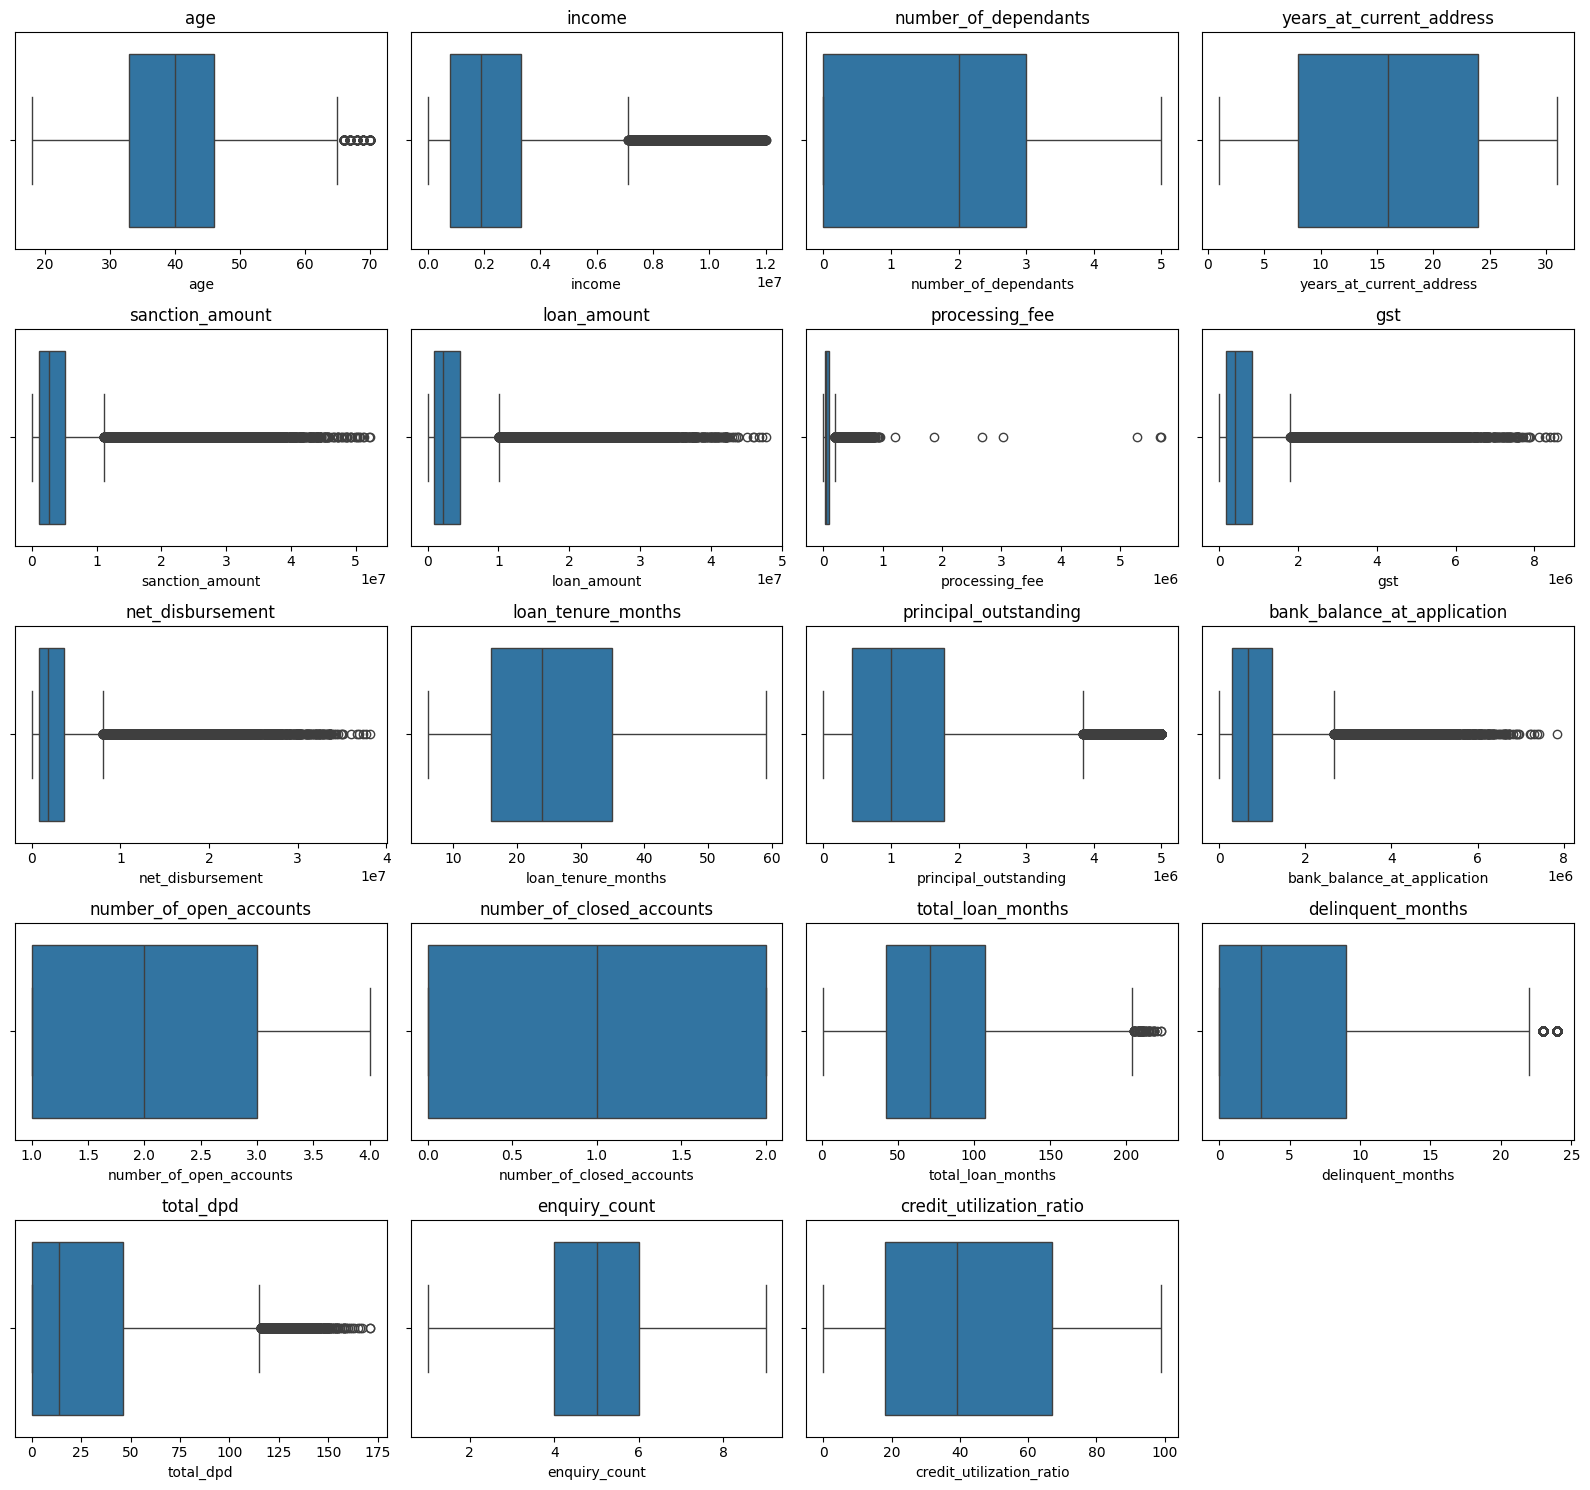

In [18]:
n_cols = 4
n_rows = -(-len(columns_continuous) // n_cols)  

plt.figure(figsize=(n_cols * 4, n_rows * 3))  

for i, col in enumerate(columns_continuous, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=df_train[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

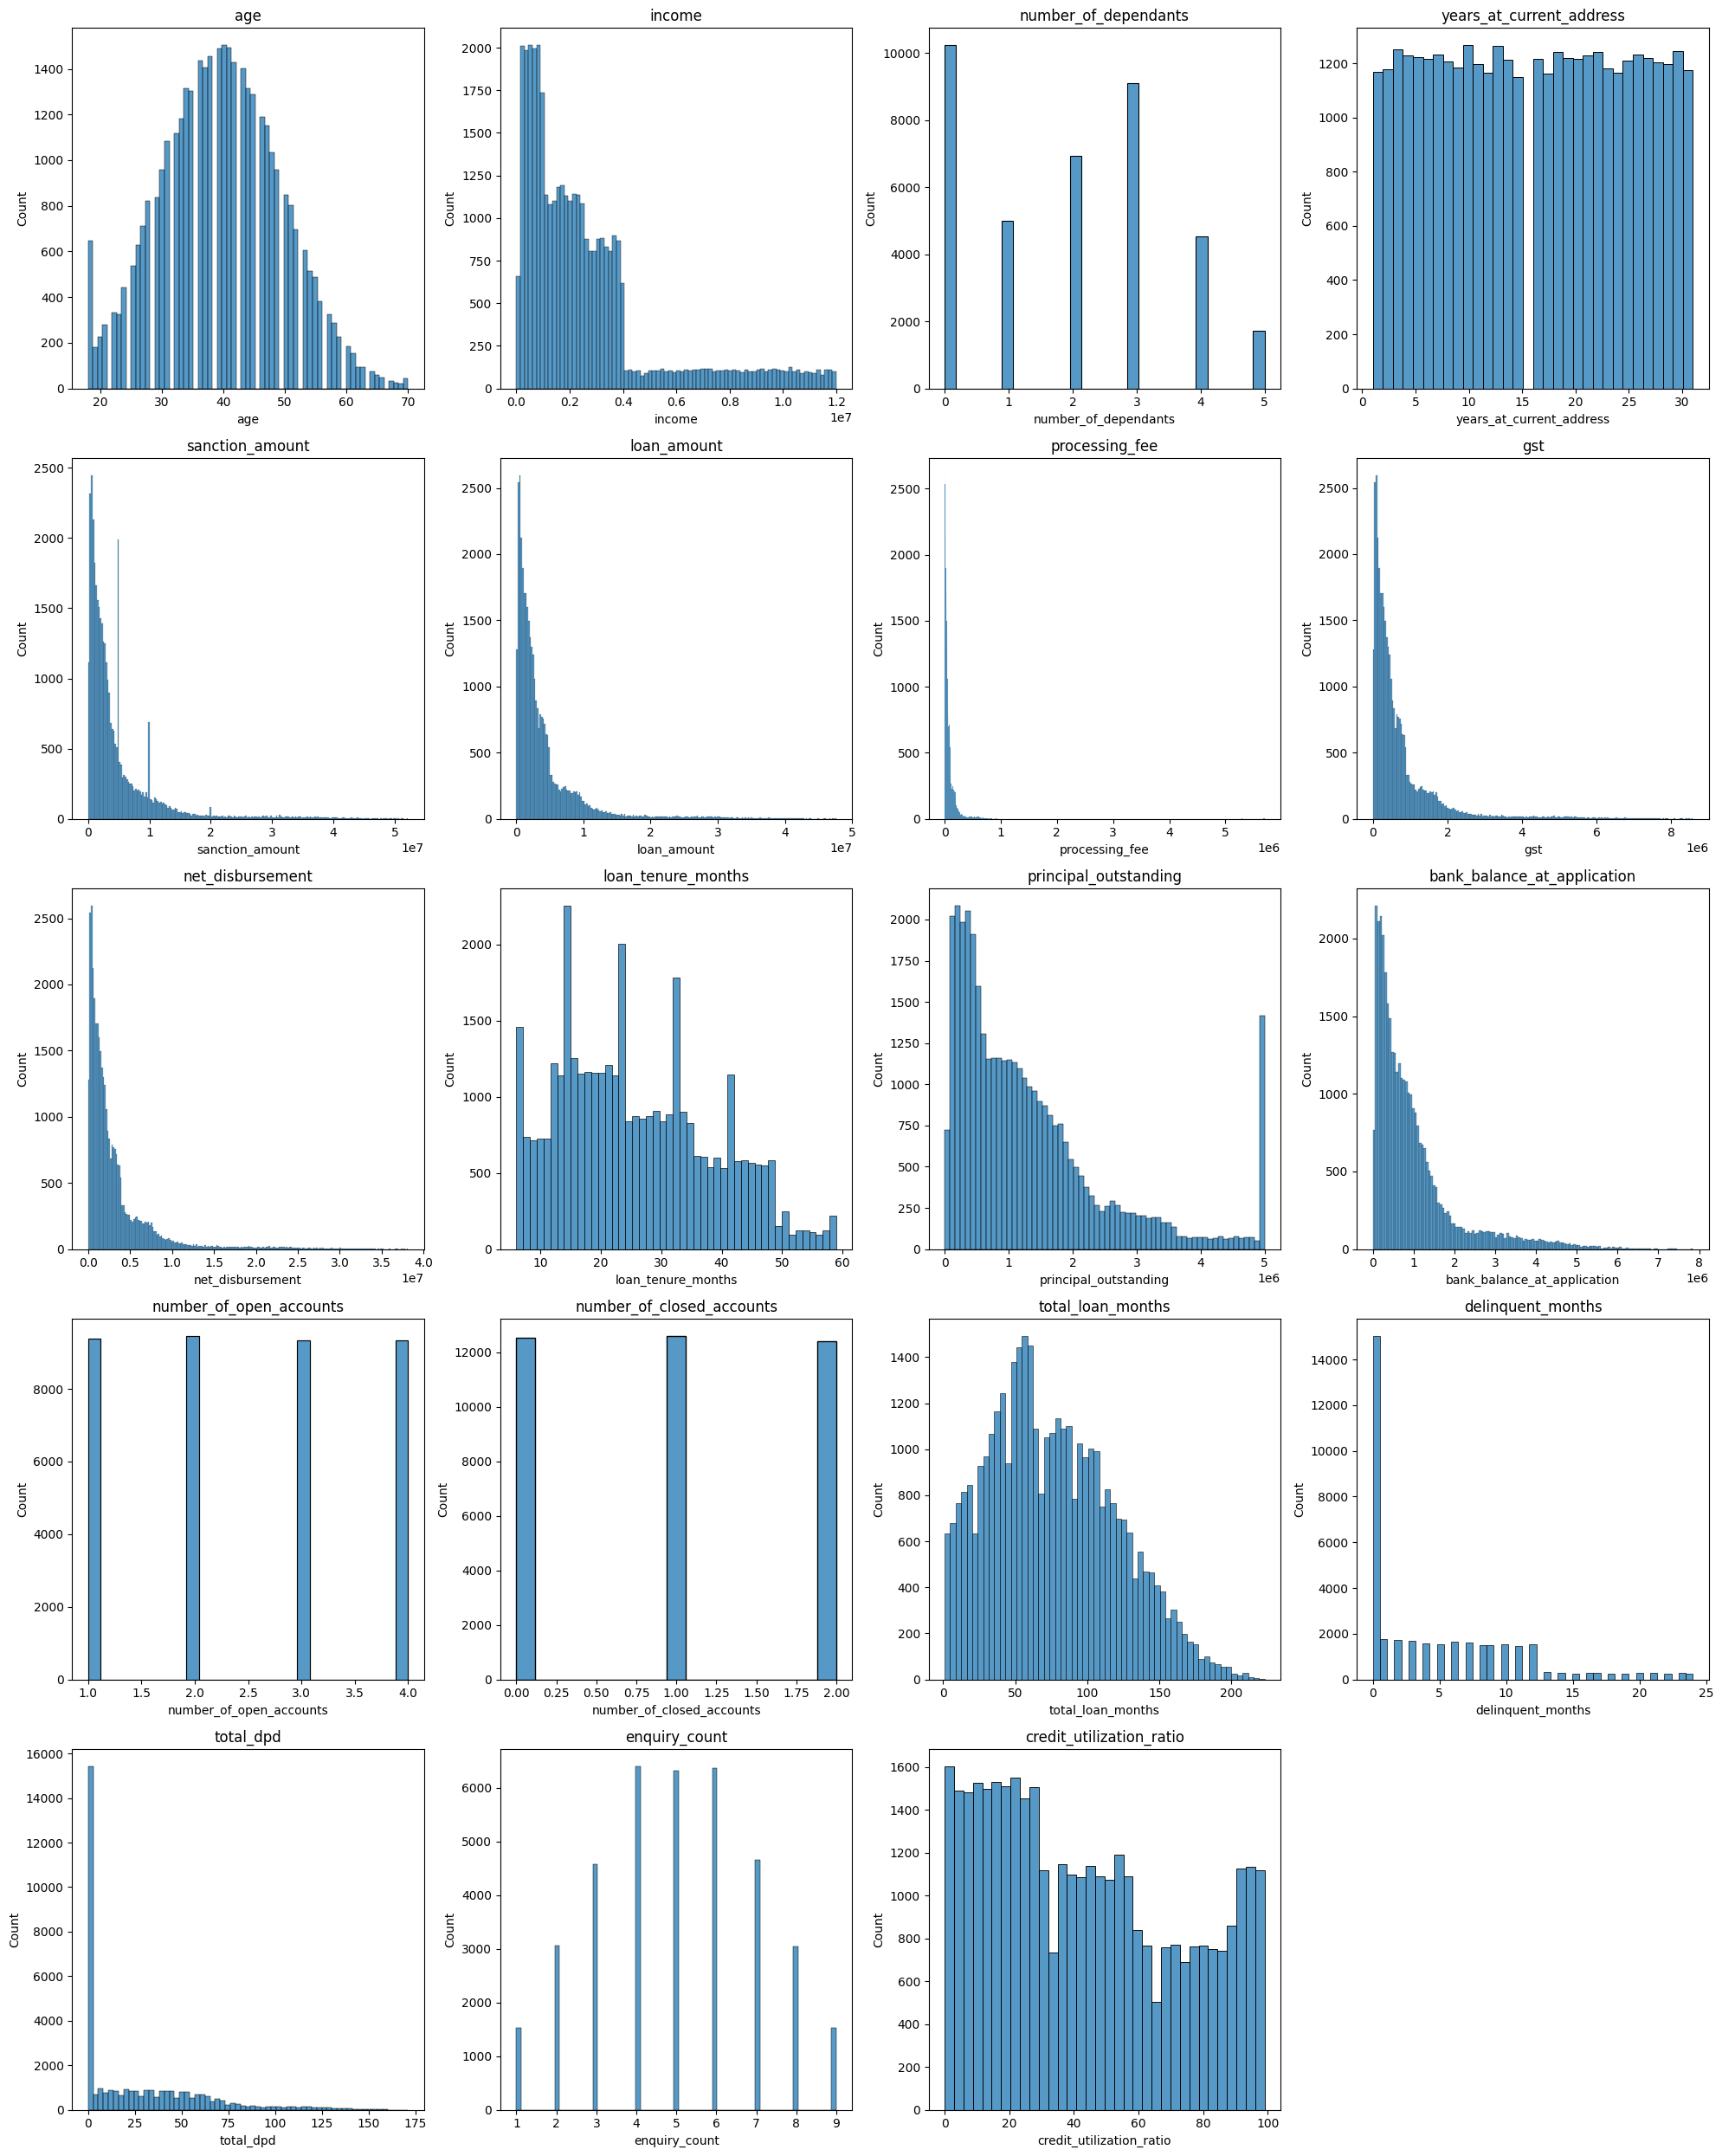

In [19]:
num_plots = len(columns_continuous)
num_cols = 4 
num_rows = (num_plots + num_cols - 1) // num_cols 

fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5 * num_rows))  
axes = axes.flatten() 

for i, col in enumerate(columns_continuous):
    sns.histplot(df_train[col], ax=axes[i])
    axes[i].set_title(col)

for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [20]:
print(df_train['processing_fee'].describe())

count      37500.00
mean       80724.11
std       120830.65
min            0.00
25%        19180.00
50%        44700.00
75%        92000.00
max      5698029.90
Name: processing_fee, dtype: float64


In [21]:
print(df_train[(df_train['processing_fee']/df_train['loan_amount'])>0.03][['loan_amount','processing_fee']])

       loan_amount  processing_fee
23981      2234000      2669791.02
9898       3626000      5293543.52
47089      1738000      1858964.77
33705      3812000      5678020.86
12294      4639000      5698029.90
28174       966000      1214492.67
29305      2616000      3036378.01


In [22]:
df_train_1=df_train[(df_train['processing_fee']/df_train['loan_amount'])<0.03].copy()
print(df_train_1[(df_train_1['processing_fee']/df_train_1['loan_amount'])>0.03][['loan_amount','processing_fee']])
#do  this on test as well

Empty DataFrame
Columns: [loan_amount, processing_fee]
Index: []


In [23]:
df_test=df_test[(df_test['processing_fee']/df_test['loan_amount'])<0.03].copy()
print(df_test.shape)

(12498, 33)


In [24]:
print(columns_categorical)

['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']


In [25]:
for col in columns_categorical:
    print(col," : ",df_train_1[col].unique())

gender  :  ['F' 'M']
marital_status  :  ['Single' 'Married']
employment_status  :  ['Salaried' 'Self-Employed']
residence_type  :  ['Owned' 'Mortgage' 'Rented']
city  :  ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state  :  ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode  :  [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
loan_purpose  :  ['Home' 'Auto' 'Personal' 'Education' 'Personaal']
loan_type  :  ['Secured' 'Unsecured']
default  :  [0 1]


In [26]:
df_train_1['loan_purpose']=df_train_1['loan_purpose'].replace('Personaal','Personal')
df_test['loan_purpose']=df_test['loan_purpose'].replace('Personaal','Personal')
for col in columns_categorical:
    print(col," : ",df_train_1[col].unique())

gender  :  ['F' 'M']
marital_status  :  ['Single' 'Married']
employment_status  :  ['Salaried' 'Self-Employed']
residence_type  :  ['Owned' 'Mortgage' 'Rented']
city  :  ['Ahmedabad' 'Delhi' 'Lucknow' 'Bangalore' 'Jaipur' 'Hyderabad' 'Kolkata'
 'Pune' 'Chennai' 'Mumbai']
state  :  ['Gujarat' 'Delhi' 'Uttar Pradesh' 'Karnataka' 'Rajasthan' 'Telangana'
 'West Bengal' 'Maharashtra' 'Tamil Nadu']
zipcode  :  [380001 110001 226001 560001 302001 500001 700001 411001 600001 400001]
loan_purpose  :  ['Home' 'Auto' 'Personal' 'Education']
loan_type  :  ['Secured' 'Unsecured']
default  :  [0 1]


In [27]:
print(df_train_1[(df_train_1['gst']/df_train_1['loan_amount'])>0.2])

Empty DataFrame
Columns: [cust_id, age, gender, marital_status, employment_status, income, number_of_dependants, residence_type, years_at_current_address, city, state, zipcode, loan_id, loan_purpose, loan_type, sanction_amount, loan_amount, processing_fee, gst, net_disbursement, loan_tenure_months, principal_outstanding, bank_balance_at_application, disbursal_date, installment_start_dt, number_of_open_accounts, number_of_closed_accounts, total_loan_months, delinquent_months, total_dpd, enquiry_count, credit_utilization_ratio, default]
Index: []


In [28]:
print(df_train_1[(df_train_1['processing_fee']/df_train_1['loan_amount'])>0.02]) #this shows 2%

Empty DataFrame
Columns: [cust_id, age, gender, marital_status, employment_status, income, number_of_dependants, residence_type, years_at_current_address, city, state, zipcode, loan_id, loan_purpose, loan_type, sanction_amount, loan_amount, processing_fee, gst, net_disbursement, loan_tenure_months, principal_outstanding, bank_balance_at_application, disbursal_date, installment_start_dt, number_of_open_accounts, number_of_closed_accounts, total_loan_months, delinquent_months, total_dpd, enquiry_count, credit_utilization_ratio, default]
Index: []


In [29]:
# Exploratory Data Analysis

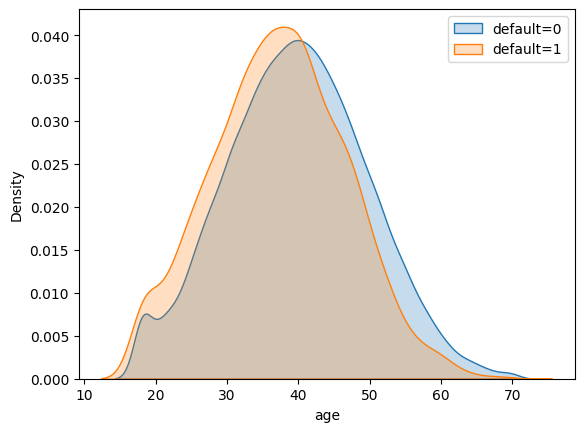

In [30]:
sns.kdeplot(df_train_1[df_train_1['default']==0]['age'],fill=True, label='default=0')
sns.kdeplot(df_train_1[df_train_1['default']==1]['age'],fill=True, label='default=1')
plt.legend()
plt.show()
 # NOTE : here orange graph shift to left or less age which means people with young age defaults more liekly

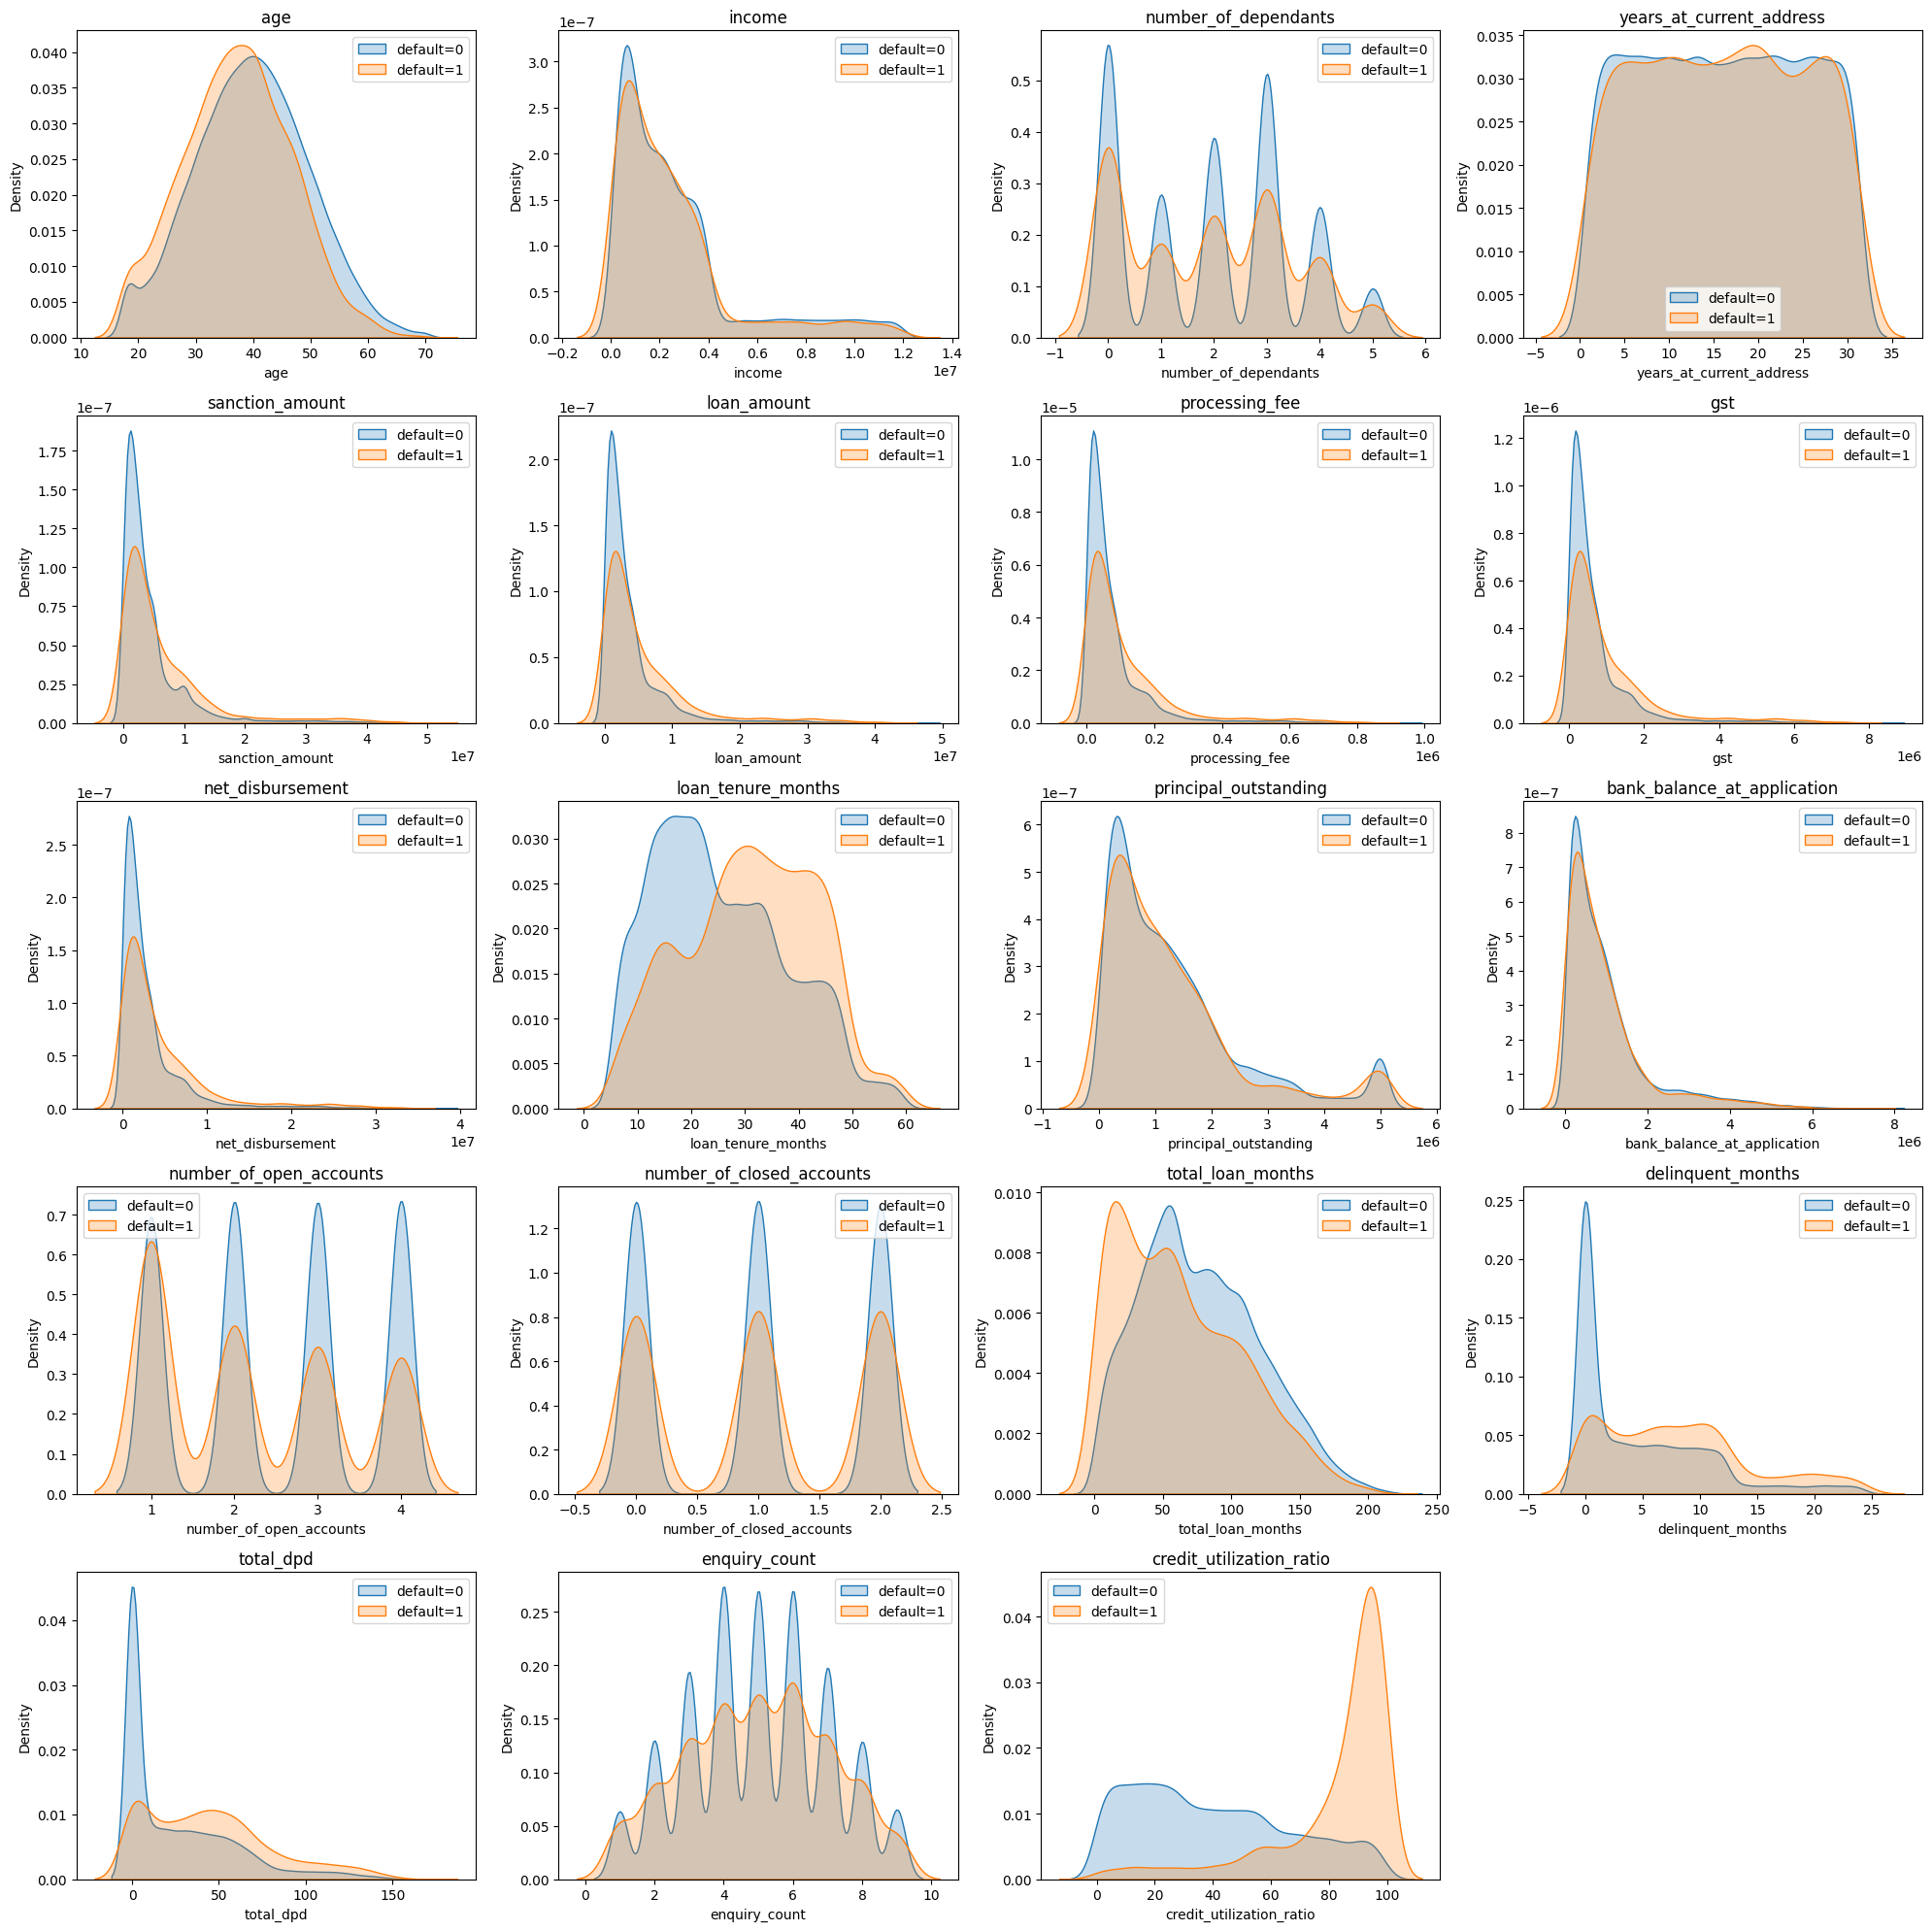

In [31]:
import math
n_cols = 4
n_rows = math.ceil(len(columns_continuous) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()
for i, col in enumerate(columns_continuous):
    sns.kdeplot(df_train_1[df_train_1['default'] == 0][col], fill=True, label='default=0', ax=axes[i])
    sns.kdeplot(df_train_1[df_train_1['default'] == 1][col], fill=True, label='default=1', ax=axes[i])
    axes[i].set_title(col)
    axes[i].legend()

for j in range(len(columns_continuous), len(axes)):
    axes[j].axis('off')
plt.tight_layout()
plt.show()
# NOTE : higher loan tenure months likely to default 
# NOTE : lesser total loan months likely to default
# NOTE : higher credit utilisation ratio likely to default 

#FEATURE ENGINEERING

In [32]:
print(df_train_1[['loan_amount','income']])


       loan_amount   income
27434      3276000  1131000
13400      2540000  2343000
883        1920000  2891000
7303        298000   272000
45124       260000   141000
...            ...      ...
11284      4760000  3506000
44732      5302000  3889000
38158      6570000  2420000
860        3194000  2133000
15795      1696000  2165000

[37487 rows x 2 columns]


In [33]:
df_train_1['loan_to_income']=round(df_train_1['loan_amount']/df_train_1['income'],2)
df_test['loan_to_income']=round(df_test['loan_amount']/df_test['income'],2)
print(df_train_1.head(3))

      cust_id  age gender marital_status employment_status   income  number_of_dependants residence_type  years_at_current_address       city          state  zipcode loan_id loan_purpose  loan_type  sanction_amount  loan_amount  processing_fee     gst  net_disbursement  loan_tenure_months  principal_outstanding  bank_balance_at_application disbursal_date installment_start_dt  number_of_open_accounts  number_of_closed_accounts  total_loan_months  delinquent_months  total_dpd  enquiry_count  credit_utilization_ratio  default  loan_to_income
27434  C27435   45      F         Single          Salaried  1131000                     0          Owned                         5  Ahmedabad        Gujarat   380001  L27435         Home    Secured          3458000      3276000        65520.00  589680           2620800                  24                 905176                       566117     2022-04-21           2022-05-21                        4                          2                 90       

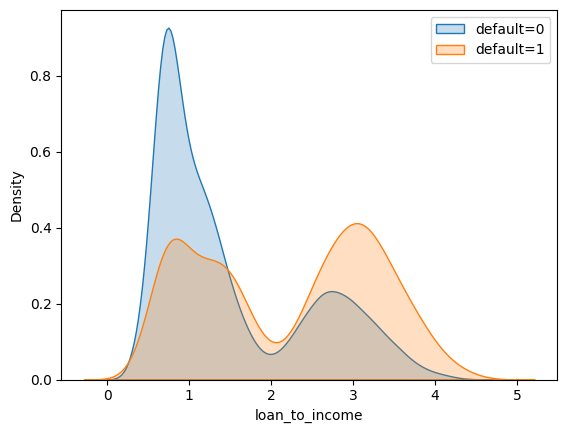

In [34]:
sns.kdeplot(df_train_1[df_train_1['default']==0]['loan_to_income'],fill=True, label='default=0')
sns.kdeplot(df_train_1[df_train_1['default']==1]['loan_to_income'],fill=True, label='default=1')
plt.legend()
plt.show()
# NOTE : higher LTI likely to default

In [35]:
print(df_train_1[['delinquent_months','total_loan_months']])

       delinquent_months  total_loan_months
27434                  6                 90
13400                  4                119
883                   14                 83
7303                   0                 37
45124                  6                 62
...                  ...                ...
11284                 23                129
44732                  0                 80
38158                  0                  8
860                    5                130
15795                  4                 82

[37487 rows x 2 columns]


In [36]:
df_train_1['delinquency_ratio']=round(df_train_1['delinquent_months']*100/df_train_1['total_loan_months'],1)
df_test['delinquency_ratio']=round(df_test['delinquent_months']*100/df_test['total_loan_months'],1)
print(df_train_1.head(3))

      cust_id  age gender marital_status employment_status   income  number_of_dependants residence_type  years_at_current_address       city          state  zipcode loan_id loan_purpose  loan_type  sanction_amount  loan_amount  processing_fee     gst  net_disbursement  loan_tenure_months  principal_outstanding  bank_balance_at_application disbursal_date installment_start_dt  number_of_open_accounts  number_of_closed_accounts  total_loan_months  delinquent_months  total_dpd  enquiry_count  credit_utilization_ratio  default  loan_to_income  delinquency_ratio
27434  C27435   45      F         Single          Salaried  1131000                     0          Owned                         5  Ahmedabad        Gujarat   380001  L27435         Home    Secured          3458000      3276000        65520.00  589680           2620800                  24                 905176                       566117     2022-04-21           2022-05-21                        4                          2       

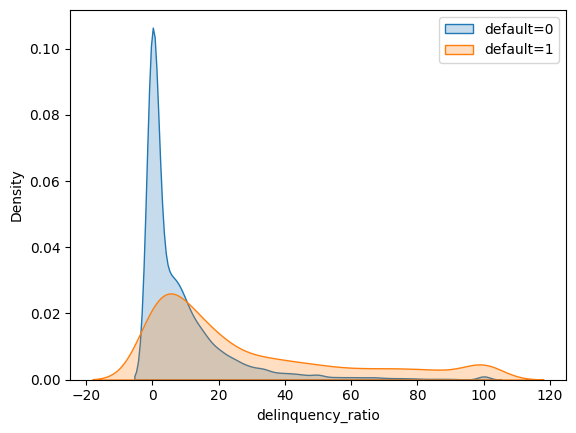

In [37]:
sns.kdeplot(df_train_1[df_train_1['default']==0]['delinquency_ratio'],fill=True, label='default=0')
sns.kdeplot(df_train_1[df_train_1['default']==1]['delinquency_ratio'],fill=True, label='default=1')
plt.legend()
plt.show()
# NOTE : Lower delinquency ratio NOT likely to default

In [38]:
print(df_train_1[['total_dpd','delinquent_months']])

       total_dpd  delinquent_months
27434         33                  6
13400         17                  4
883           78                 14
7303           0                  0
45124         28                  6
...          ...                ...
11284        126                 23
44732          0                  0
38158          0                  0
860           24                  5
15795         15                  4

[37487 rows x 2 columns]


In [39]:
df_train_1['avg_dpd_per_delinquency']=np.where(
    df_train_1['delinquent_months'] !=0,
    round(df_train_1['total_dpd']/df_train_1['delinquent_months'],1),
    0
)

df_test['avg_dpd_per_delinquency']=np.where(
    df_test['delinquent_months'] !=0,
    round(df_test['total_dpd']/df_test['delinquent_months'],1),
    0
)

print(df_train_1.head(3))
print(df_train_1['avg_dpd_per_delinquency'].isna().sum()) # b'coz delinquent months can be 0 which we handled above

      cust_id  age gender marital_status employment_status   income  number_of_dependants residence_type  years_at_current_address       city          state  zipcode loan_id loan_purpose  loan_type  sanction_amount  loan_amount  processing_fee     gst  net_disbursement  loan_tenure_months  principal_outstanding  bank_balance_at_application disbursal_date installment_start_dt  number_of_open_accounts  number_of_closed_accounts  total_loan_months  delinquent_months  total_dpd  enquiry_count  credit_utilization_ratio  default  loan_to_income  delinquency_ratio  avg_dpd_per_delinquency
27434  C27435   45      F         Single          Salaried  1131000                     0          Owned                         5  Ahmedabad        Gujarat   380001  L27435         Home    Secured          3458000      3276000        65520.00  589680           2620800                  24                 905176                       566117     2022-04-21           2022-05-21                        4         

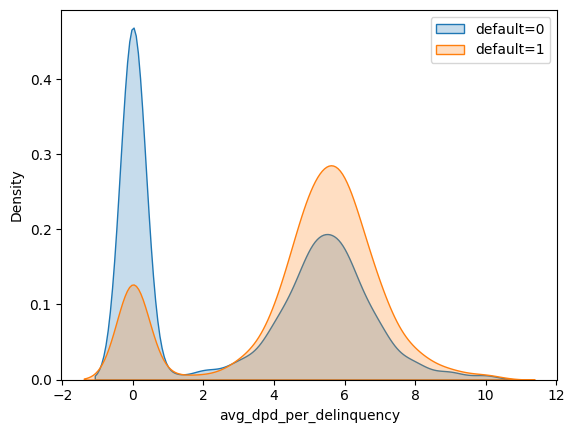

In [40]:
sns.kdeplot(df_train_1[df_train_1['default']==0]['avg_dpd_per_delinquency'],fill=True, label='default=0')
sns.kdeplot(df_train_1[df_train_1['default']==1]['avg_dpd_per_delinquency'],fill=True, label='default=1')
plt.legend()
plt.show()
# NOTE : higher avg dpd per delinquency likely to default

# FEATURE SELECTION

In [41]:
print(df_train_1.columns)

Index(['cust_id', 'age', 'gender', 'marital_status', 'employment_status', 'income', 'number_of_dependants', 'residence_type', 'years_at_current_address', 'city', 'state', 'zipcode', 'loan_id', 'loan_purpose', 'loan_type', 'sanction_amount', 'loan_amount', 'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application', 'disbursal_date', 'installment_start_dt', 'number_of_open_accounts', 'number_of_closed_accounts', 'total_loan_months', 'delinquent_months', 'total_dpd', 'enquiry_count', 'credit_utilization_ratio', 'default', 'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype='object')


In [42]:
df_train_2=df_train_1.drop(['cust_id','loan_id'],axis='columns')
df_test=df_test.drop(['cust_id','loan_id'],axis='columns')


df_train_3 = df_train_2.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income','total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")
df_test = df_test.drop(['disbursal_date', 'installment_start_dt', 'loan_amount', 'income','total_loan_months', 'delinquent_months', 'total_dpd'], axis="columns")

print(df_train_3.columns)

Index(['age', 'gender', 'marital_status', 'employment_status', 'number_of_dependants', 'residence_type', 'years_at_current_address', 'city', 'state', 'zipcode', 'loan_purpose', 'loan_type', 'sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application', 'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count', 'credit_utilization_ratio', 'default', 'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype='object')


In [43]:
df_train_3['default']=df_train_3['default'].astype('int32')
df_train_3['zipcode']=df_train_3['zipcode'].astype('object')

print(df_train_3.info())

<class 'pandas.core.frame.DataFrame'>
Index: 37487 entries, 27434 to 15795
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          37487 non-null  int64  
 1   gender                       37487 non-null  object 
 2   marital_status               37487 non-null  object 
 3   employment_status            37487 non-null  object 
 4   number_of_dependants         37487 non-null  int64  
 5   residence_type               37487 non-null  object 
 6   years_at_current_address     37487 non-null  int64  
 7   city                         37487 non-null  object 
 8   state                        37487 non-null  object 
 9   zipcode                      37487 non-null  object 
 10  loan_purpose                 37487 non-null  object 
 11  loan_type                    37487 non-null  object 
 12  sanction_amount              37487 non-null  int64  
 13  processing_fee   

In [44]:
print(df_train_3.select_dtypes(include=["int64", "float64"]).columns)


Index(['age', 'number_of_dependants', 'years_at_current_address', 'sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application', 'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count', 'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype='object')


In [45]:
Xtrain = df_train_3.drop('default',axis='columns')
ytrain = df_train_3['default']

cols_to_scale= df_train_3.select_dtypes(include=["int64", "float64"]).columns

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
Xtrain[cols_to_scale] = scaler.fit_transform(Xtrain[cols_to_scale])

print(Xtrain.head(3))


        age gender marital_status employment_status  number_of_dependants residence_type  years_at_current_address       city          state zipcode loan_purpose  loan_type  sanction_amount  processing_fee   gst  net_disbursement  loan_tenure_months  principal_outstanding  bank_balance_at_application  number_of_open_accounts  number_of_closed_accounts  enquiry_count  credit_utilization_ratio  loan_to_income  delinquency_ratio  avg_dpd_per_delinquency
27434  0.52      F         Single          Salaried                  0.00          Owned                      0.13  Ahmedabad        Gujarat  380001         Home    Secured             0.07            0.07  0.07              0.07                0.34                   0.18                         0.07                     1.00                       1.00           0.88                      0.60            0.61               0.07                     0.55
13400  0.21      M         Single          Salaried                  0.00          Owned  

In [46]:
Xtest = df_test.drop('default',axis='columns')
ytest = df_test['default']

Xtest[cols_to_scale]=scaler.transform(Xtest[cols_to_scale])
print(Xtest.head(3))


        age gender marital_status employment_status  number_of_dependants residence_type  years_at_current_address       city      state  zipcode loan_purpose loan_type  sanction_amount  processing_fee   gst  net_disbursement  loan_tenure_months  principal_outstanding  bank_balance_at_application  number_of_open_accounts  number_of_closed_accounts  enquiry_count  credit_utilization_ratio  loan_to_income  delinquency_ratio  avg_dpd_per_delinquency
33553  0.35      F        Married     Self-Employed                  0.60          Owned                      0.47  Hyderabad  Telangana   500001    Education   Secured             0.12            0.10  0.10              0.10                0.53                   0.30                         0.23                     0.33                       1.00           0.50                      0.12            0.26               0.04                     0.90
9427   0.29      F         Single          Salaried                  0.00          Owned          

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif(data):
    vif_df = pd.DataFrame()
    vif_df['Column'] = data.columns
    vif_df['VIF'] = [variance_inflation_factor(data.values,i) for i in range(data.shape[1])]
    return vif_df



In [48]:
print(vif(Xtrain[cols_to_scale]))

c:\Users\SAKET\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                         Column     VIF
0                           age    5.58
1          number_of_dependants    2.72
2      years_at_current_address    3.36
3               sanction_amount  102.15
4                processing_fee     inf
5                           gst     inf
6              net_disbursement     inf
7            loan_tenure_months    6.13
8         principal_outstanding   16.27
9   bank_balance_at_application    9.27
10      number_of_open_accounts    4.35
11    number_of_closed_accounts    2.34
12                enquiry_count    6.32
13     credit_utilization_ratio    2.89
14               loan_to_income    6.85
15            delinquency_ratio    1.94
16      avg_dpd_per_delinquency    2.92


In [49]:
features_to_drop_vif = ['sanction_amount', 'processing_fee', 'gst', 'net_disbursement','principal_outstanding']

Xtrain_1 = Xtrain.drop(features_to_drop_vif,axis='columns')

numeric_columns = Xtrain_1.select_dtypes(include=["int64", "float64"]).columns


In [50]:
vif_df = vif(Xtrain_1[numeric_columns])
print(vif_df)

                         Column   VIF
0                           age  5.29
1          number_of_dependants  2.72
2      years_at_current_address  3.34
3            loan_tenure_months  5.97
4   bank_balance_at_application  1.79
5       number_of_open_accounts  4.31
6     number_of_closed_accounts  2.33
7                 enquiry_count  6.28
8      credit_utilization_ratio  2.88
9                loan_to_income  4.51
10            delinquency_ratio  1.94
11      avg_dpd_per_delinquency  2.92


In [51]:
selected_numeric_feature_vif = vif_df.Column.values
print(selected_numeric_feature_vif)

['age' 'number_of_dependants' 'years_at_current_address'
 'loan_tenure_months' 'bank_balance_at_application'
 'number_of_open_accounts' 'number_of_closed_accounts' 'enquiry_count'
 'credit_utilization_ratio' 'loan_to_income' 'delinquency_ratio'
 'avg_dpd_per_delinquency']


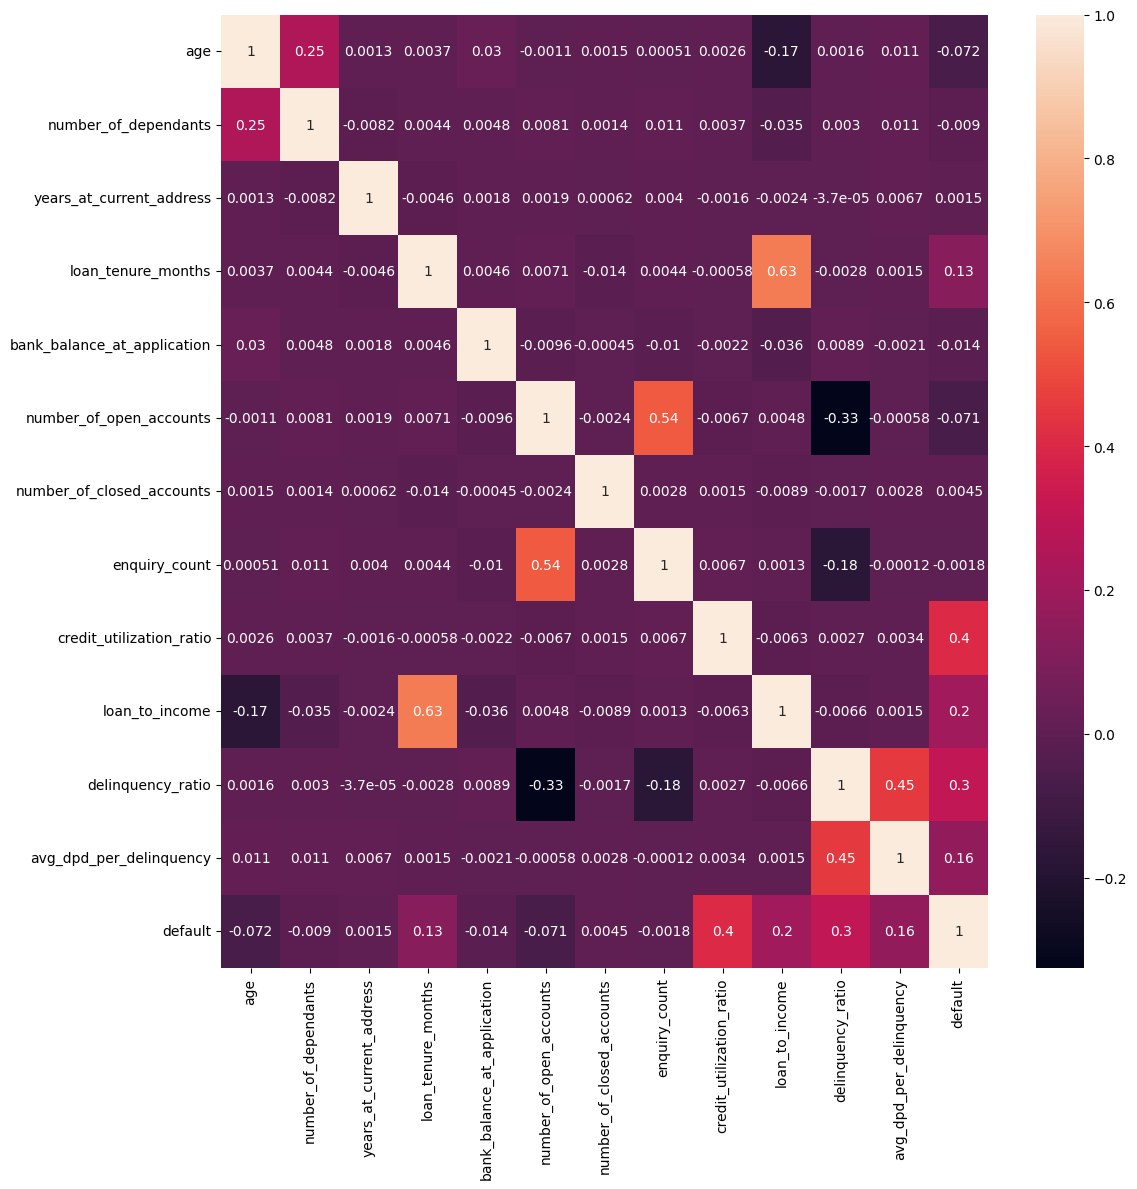

In [52]:
plt.figure(figsize=(12,12))
cm = df_train_3[numeric_columns.append(pd.Index(['default']))].corr()
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

In [53]:
print(columns_categorical)

['gender', 'marital_status', 'employment_status', 'residence_type', 'city', 'state', 'zipcode', 'loan_purpose', 'loan_type', 'default']


In [54]:
# WOE = ln(proportion of good /proportion of bad) 
# IV = summation of (WOE*(proportion of good - proportion of bad))

In [55]:
def calculate_woe_iv(df,feature,target):
    grouped=df.groupby(feature)[target].agg(['count','sum'])
    grouped = grouped.rename({
        'count':'total',
        'sum':'good'
    },axis=1)
    grouped['bad']=grouped['total']-grouped['good']
    total_good= grouped['good'].sum()
    total_bad= grouped['bad'].sum()
    grouped['good_pct']=grouped['good']/total_good
    grouped['bad_pct']=grouped['bad']/total_bad
    grouped['woe']= np.log(grouped['good_pct']/grouped['bad_pct'])
    grouped['iv']= grouped['woe']*(grouped['good_pct']-grouped['bad_pct'])

    grouped['woe']=grouped['woe'].replace([np.inf,-np.inf],0)
    grouped['iv']=grouped['iv'].replace([np.inf,-np.inf],0)

    total_iv = grouped['iv'].sum()

    return(grouped,total_iv)

grouped,total_iv = calculate_woe_iv(pd.concat([Xtrain_1,ytrain],axis=1),'loan_purpose','default')
print(grouped)
print(total_iv)

              total  good    bad  good_pct  bad_pct   woe    iv
loan_purpose                                                   
Auto           7437   314   7123      0.10     0.21 -0.75  0.08
Education      5626   546   5080      0.17     0.15  0.14  0.00
Home          11271  1744   9527      0.55     0.28  0.68  0.18
Personal      13153   585  12568      0.18     0.37 -0.69  0.13
0.39377543144164784


In [56]:
iv_values={}
for feature in Xtrain_1.columns:
    if(Xtrain_1[feature].dtype=='object'):
       _,iv= calculate_woe_iv(pd.concat([Xtrain_1,ytrain],axis=1),feature,'default')
    else:
        Xbinned=pd.cut(Xtrain_1[feature],bins=20,labels=False)
        _,iv=calculate_woe_iv(pd.concat([Xbinned,ytrain],axis=1),feature,'default')
        
    iv_values[feature]=iv


print(iv_values)

{'age': np.float64(0.07919413819885894), 'gender': np.float64(0.000482276463421216), 'marital_status': np.float64(0.002196681370832318), 'employment_status': np.float64(0.002447818101774487), 'number_of_dependants': np.float64(0.00364589452118596), 'residence_type': np.float64(0.2594019617563985), 'years_at_current_address': np.float64(0.003758716380265605), 'city': np.float64(0.000817870465334103), 'state': np.float64(0.0007881984519711978), 'zipcode': np.float64(0.000817870465334103), 'loan_purpose': np.float64(0.39377543144164784), 'loan_type': np.float64(0.17304705897793143), 'loan_tenure_months': np.float64(0.26029321023564794), 'bank_balance_at_application': np.float64(0.007715403820717738), 'number_of_open_accounts': np.float64(0.07324250836253295), 'number_of_closed_accounts': np.float64(0.00026280824021760536), 'enquiry_count': np.float64(0.005484982638303533), 'credit_utilization_ratio': np.float64(2.4645173019948814), 'loan_to_income': np.float64(0.5185003744191993), 'delinq

c:\Users\SAKET\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [57]:
pd.set_option('display.float_format',lambda x: '{: .3f}'.format(x))
iv_df = pd.DataFrame(list(iv_values.items()),columns=['feature','iv'])
iv_df = iv_df.sort_values(by='iv',ascending=False)
print(iv_df)

                        feature     iv
17     credit_utilization_ratio  2.465
19            delinquency_ratio  0.780
18               loan_to_income  0.519
20      avg_dpd_per_delinquency  0.429
10                 loan_purpose  0.394
12           loan_tenure_months  0.260
5                residence_type  0.259
11                    loan_type  0.173
0                           age  0.079
14      number_of_open_accounts  0.073
13  bank_balance_at_application  0.008
16                enquiry_count  0.005
6      years_at_current_address  0.004
4          number_of_dependants  0.004
3             employment_status  0.002
2                marital_status  0.002
7                          city  0.001
9                       zipcode  0.001
8                         state  0.001
1                        gender  0.000
15    number_of_closed_accounts  0.000


In [58]:
selected_features_iv = list(iv_df[iv_df['iv']>0.02]['feature'])
print(selected_features_iv)

['credit_utilization_ratio', 'delinquency_ratio', 'loan_to_income', 'avg_dpd_per_delinquency', 'loan_purpose', 'loan_tenure_months', 'residence_type', 'loan_type', 'age', 'number_of_open_accounts']


In [59]:
set(['credit_utilization_ratio', 'delinquency_ratio',
  'loan_to_income', 'avg_dpd_per_delinquency', 
 'loan_purpose', 'loan_tenure_months', 'residence_type',
   'loan_type', 'age', 'number_of_open_accounts'])==set(['age','residence_type','loan_purpose',
                                                         'loan_type','loan_tenure_months','number_of_open_accounts',
                                                         'credit_utilization_ratio','loan_to_income','delinquency_ratio','avg_dpd_per_delinquency'])

Xtrain_1=Xtrain_1[['age','residence_type','loan_purpose','loan_type','loan_tenure_months','number_of_open_accounts',
            'credit_utilization_ratio','loan_to_income','delinquency_ratio','avg_dpd_per_delinquency']]

Xtest=Xtest[['age','residence_type','loan_purpose','loan_type','loan_tenure_months','number_of_open_accounts',
            'credit_utilization_ratio','loan_to_income','delinquency_ratio','avg_dpd_per_delinquency']]

# FEATURE ENCODING

In [60]:
Xtrain_reduced = Xtrain_1[selected_features_iv]
Xtest_reduced = Xtest[selected_features_iv]

Xtrain_reduced=Xtrain_reduced[['age','residence_type','loan_purpose','loan_type','loan_tenure_months','number_of_open_accounts',
            'credit_utilization_ratio','loan_to_income','delinquency_ratio','avg_dpd_per_delinquency']]

Xtest_reduced=Xtest_reduced[['age','residence_type','loan_purpose','loan_type','loan_tenure_months','number_of_open_accounts',
            'credit_utilization_ratio','loan_to_income','delinquency_ratio','avg_dpd_per_delinquency']]

print(Xtrain_reduced.head(3))

         age residence_type loan_purpose  loan_type  loan_tenure_months  number_of_open_accounts  credit_utilization_ratio  loan_to_income  delinquency_ratio  avg_dpd_per_delinquency
27434  0.519          Owned         Home    Secured               0.340                    1.000                     0.596           0.609              0.067                    0.550
13400  0.212          Owned         Auto    Secured               0.509                    0.667                     0.929           0.183              0.034                    0.420
883    0.615       Mortgage     Personal  Unsecured               0.245                    0.333                     0.838           0.084              0.169                    0.560


In [61]:
Xtrain_encoded= pd.get_dummies(Xtrain_reduced,drop_first=True,dtype=int)
Xtest_encoded= pd.get_dummies(Xtest_reduced,drop_first=True,dtype=int)

print(Xtrain_encoded.head(3))

         age  loan_tenure_months  number_of_open_accounts  credit_utilization_ratio  loan_to_income  delinquency_ratio  avg_dpd_per_delinquency  residence_type_Owned  residence_type_Rented  loan_purpose_Education  loan_purpose_Home  loan_purpose_Personal  loan_type_Unsecured
27434  0.519               0.340                    1.000                     0.596           0.609              0.067                    0.550                     1                      0                       0                  1                      0                    0
13400  0.212               0.509                    0.667                     0.929           0.183              0.034                    0.420                     1                      0                       0                  0                      0                    0
883    0.615               0.245                    0.333                     0.838           0.084              0.169                    0.560                     0       

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model_lr = LogisticRegression()
model_lr.fit(Xtrain_encoded,ytrain)
ypred_lr=model_lr.predict(Xtest_encoded)
print(classification_report(ytest,ypred_lr)) #WE WANT RECALL ON DEFAULT CLASS TO BE ABOVE 0.90


              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [63]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = LogisticRegression()
model_rfc.fit(Xtrain_encoded,ytrain)
ypred_rfc=model_rfc.predict(Xtest_encoded)
print(classification_report(ytest,ypred_rfc)) 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [64]:
from xgboost import XGBClassifier

model_xgb = LogisticRegression()
model_xgb.fit(Xtrain_encoded,ytrain)
ypred_xgb=model_xgb.predict(Xtest_encoded)
print(classification_report(ytest,ypred_xgb)) 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.84      0.69      0.76      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.84      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [65]:
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'C': np.logspace(-4, 4, 20), 
    'solver': ['lbfgs', 'saga', 'liblinear', 'newton-cg']
}
log_reg = LogisticRegression(max_iter=10000) 
random_search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=param_dist,
    n_iter=50,  
    scoring='f1',
    cv=3,  
    verbose=2,
    random_state=42,  
    n_jobs=-1 
)
random_search.fit(Xtrain_encoded, ytrain)
print(random_search.best_params_)
print(random_search.best_score_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(Xtest_encoded)
print(classification_report(ytest, y_pred))

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'solver': 'lbfgs', 'C': np.float64(545.5594781168514)}
0.7629160071967581
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     11390
           1       0.83      0.71      0.77      1108

    accuracy                           0.96     12498
   macro avg       0.90      0.85      0.87     12498
weighted avg       0.96      0.96      0.96     12498



In [66]:
from scipy.stats import uniform, randint

param_dist = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'scale_pos_weight': [1, 2, 3, 5, 7, 10],
    'reg_alpha': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0],  
    'reg_lambda': [0.01, 0.1, 0.5, 1.0, 5.0, 10.0]
}

xgb = XGBClassifier()
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100, scoring='f1', cv=3, verbose=1, n_jobs=-1, random_state=42)

random_search.fit(Xtrain_encoded, ytrain)

print(random_search.best_params_)
print(random_search.best_score_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(Xtest_encoded)
print(classification_report(ytest, y_pred))

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'subsample': 0.7, 'scale_pos_weight': 2, 'reg_lambda': 10.0, 'reg_alpha': 0.01, 'n_estimators': 100, 'max_depth': 4, 'learning_rate': 0.2, 'colsample_bytree': 0.8}
0.7916996030173474
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11390
           1       0.78      0.82      0.80      1108

    accuracy                           0.96     12498
   macro avg       0.88      0.90      0.89     12498
weighted avg       0.96      0.96      0.96     12498



In [67]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
Xtrain_rus , ytrain_rus = rus.fit_resample(Xtrain_encoded,ytrain)
print(ytrain_rus.value_counts())



default
0    3189
1    3189
Name: count, dtype: int64


In [68]:
model = LogisticRegression()
model.fit(Xtrain_rus,ytrain_rus)

ypred = model.predict(Xtest_encoded)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.92      0.96     11390
           1       0.53      0.95      0.68      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.93      0.82     12498
weighted avg       0.95      0.92      0.93     12498



In [69]:
model = XGBClassifier(**random_search.best_params_)
model.fit(Xtrain_rus, ytrain_rus)

y_pred = model.predict(Xtest_encoded)
print(classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     11390
           1       0.53      0.98      0.69      1108

    accuracy                           0.92     12498
   macro avg       0.76      0.95      0.82     12498
weighted avg       0.96      0.92      0.93     12498



In [70]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
Xtrain_smt, ytrain_smt = smt.fit_resample(Xtrain_encoded,ytrain)
print(ytrain_smt.value_counts())

default
0    34223
1    34223
Name: count, dtype: int64


In [71]:
model = LogisticRegression()
model.fit(Xtrain_smt, ytrain_smt)
ypred = model.predict(Xtest_encoded)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.94      0.83     12498
weighted avg       0.96      0.93      0.94     12498



# OPTUNA

In [72]:
import optuna
from sklearn.metrics import make_scorer,f1_score
from sklearn.model_selection import cross_val_score

c:\Users\SAKET\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [73]:
def objective(trial):
    param = {
        'C': trial.suggest_float('C', 1e-4, 1e4, log=True),  
        'solver': trial.suggest_categorical('solver', ['lbfgs', 'liblinear', 'saga', 'newton-cg']), 
        'tol': trial.suggest_float('tol', 1e-6, 1e-1, log=True),  
        'class_weight': trial.suggest_categorical('class_weight', [None, 'balanced']) 
    }
    model = LogisticRegression(**param,max_iter=10000)
    f1_scorer = make_scorer(f1_score,average='macro')
    scores = cross_val_score(model,Xtrain_smt,ytrain_smt,cv=3,scoring=f1_scorer,n_jobs=-1)
    return(np.mean(scores))

study_logistic = optuna.create_study(direction='maximize')
study_logistic.optimize(objective,n_trials=50)



[I 2025-05-15 10:09:21,761] A new study created in memory with name: no-name-33267843-6513-40d5-97af-55e843553094
[I 2025-05-15 10:09:22,008] Trial 0 finished with value: 0.9449641814231461 and parameters: {'C': 1259.0525673762127, 'solver': 'newton-cg', 'tol': 0.0001239591619312882, 'class_weight': None}. Best is trial 0 with value: 0.9449641814231461.
[I 2025-05-15 10:09:22,171] Trial 1 finished with value: 0.8115655570462352 and parameters: {'C': 0.0002119917584770322, 'solver': 'liblinear', 'tol': 1.542155269726016e-06, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9449641814231461.
[I 2025-05-15 10:09:22,344] Trial 2 finished with value: 0.9199597242562795 and parameters: {'C': 0.0036500535099043374, 'solver': 'newton-cg', 'tol': 0.0007695564324836559, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.9449641814231461.
[I 2025-05-15 10:09:22,566] Trial 3 finished with value: 0.9369197833745524 and parameters: {'C': 0.08172961564366199, 'solver': 'liblinear', 

In [74]:

print(study_logistic.best_params)
best_model_logistic = LogisticRegression(**study_logistic.best_params)
best_model_logistic.fit(Xtrain_smt, ytrain_smt)

y_pred = best_model_logistic.predict(Xtest_encoded)
print(classification_report(ytest, y_pred))


{'C': 1259.0525673762127, 'solver': 'newton-cg', 'tol': 0.0001239591619312882, 'class_weight': None}
              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [75]:
# def objective(trial):
#     param = {
#         'objective': 'binary:logistic',
#         'eval_metric': 'logloss',
#         'verbosity': 0,
#         'booster': 'gbtree',
#         'lambda': trial.suggest_float('lambda', 1e-3, 10.0, log=True),
#         'alpha': trial.suggest_float('alpha', 1e-3, 10.0, log=True),
#         'subsample': trial.suggest_float('subsample', 0.4, 1.0),
#         'colsample_bytree': trial.suggest_float('colsample_bytree', 0.4, 1.0),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'eta': trial.suggest_float('eta', 0.01, 0.3),
#         'gamma': trial.suggest_float('gamma', 0, 10),
#         'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1, 10),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'max_delta_step': trial.suggest_int('max_delta_step', 0, 10)
#     }
#     model = XGBClassifier(**param)
#     f1_scorer = make_scorer(f1_score,average='macro')
#     scores = cross_val_score(model,Xtrain_smt,ytrain_smt,cv=3,scoring=f1_scorer,n_jobs=-1)
#     return(np.mean(scores))


# study_xgb = optuna.create_study(direction='maximize')
# study_xgb.optimize(objective,n_trials=50)

In [76]:
# print(study_xgb.best_params)
# best_model_xgb = XGBClassifier(**study_xgb.best_params)
# best_model_xgb.fit(Xtrain_smt, ytrain_smt)

# y_pred = best_model_xgb.predict(Xtest_encoded)
# print(classification_report(ytest, y_pred))

In [77]:
ypred = best_model_logistic.predict(Xtest_encoded)
print(classification_report(ytest,ypred))


              precision    recall  f1-score   support

           0       0.99      0.93      0.96     11390
           1       0.57      0.94      0.71      1108

    accuracy                           0.93     12498
   macro avg       0.78      0.93      0.83     12498
weighted avg       0.96      0.93      0.94     12498



In [78]:
from sklearn.metrics import roc_curve
probabilities = best_model_logistic.predict_proba(Xtest_encoded)[:,1]
# print(probabilities)

fpr,tpr,threshold = roc_curve(ytest,probabilities)
print(fpr[:10],"\n",tpr[:10],'\n',threshold[:10])

[0.         0.         0.         0.0000878  0.0000878  0.00017559
 0.00017559 0.00026339 0.00026339 0.00035119] 
 [0.         0.00090253 0.21028881 0.21028881 0.22202166 0.22202166
 0.26714801 0.26714801 0.30776173 0.30776173] 
 [       inf 0.99999992 0.99862354 0.99860603 0.99841491 0.99840936
 0.99723404 0.99722224 0.99604449 0.99599221]


In [79]:
from sklearn.metrics import auc

area = auc(fpr,tpr)
print(area)

0.9829744091181383


In [80]:
# RANK ORDERING AND KS STATISTICS

In [81]:
probabilities = best_model_logistic.predict_proba(Xtest_encoded)[:,1]
# print(probabilities)

df_eval = pd.DataFrame({
    'Default Truth':ytest,
    'Default Probability':probabilities,
})
print(df_eval.head(5))

       Default Truth  Default Probability
33553              0                0.000
9427               0                0.764
199                0                0.141
12447              0                0.421
39489              0                0.001


In [82]:
df_eval['Decile']=pd.qcut(df_eval['Default Probability'],10,labels=False,duplicates='drop')
df_eval = df_eval.sort_values('Default Probability', ascending=False)
print(df_eval.head(5))

       Default Truth  Default Probability  Decile
2907               1                1.000       9
1661               1                1.000       9
2949               1                1.000       9
15711              1                1.000       9
35448              1                1.000       9


In [83]:
df_grouped = df_eval.groupby('Decile').apply(lambda x: pd.Series({
    'Minimum Probability': x['Default Probability'].min(),
    'Maximum Probability': x['Default Probability'].max(),
    'Events': x['Default Truth'].sum(),
    'Non-events': x['Default Truth'].count() - x['Default Truth'].sum(),    
}))
df_grouped.reset_index(inplace=True)
print(df_grouped)

   Decile  Minimum Probability  Maximum Probability   Events  Non-events
0       0                0.000                0.000    0.000    1250.000
1       1                0.000                0.000    0.000    1250.000
2       2                0.000                0.000    0.000    1250.000
3       3                0.000                0.000    0.000    1249.000
4       4                0.000                0.001    0.000    1250.000
5       5                0.001                0.006    1.000    1249.000
6       6                0.006                0.035    2.000    1247.000
7       7                0.035                0.214   17.000    1233.000
8       8                0.215                0.817  170.000    1080.000
9       9                0.817                1.000  918.000     332.000


C:\Users\SAKET\AppData\Local\Temp\ipykernel_1012\107605776.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df_eval.groupby('Decile').apply(lambda x: pd.Series({


In [84]:
df_grouped = df_grouped.sort_values('Decile',ascending=False)
print(df_grouped)

   Decile  Minimum Probability  Maximum Probability   Events  Non-events
9       9                0.817                1.000  918.000     332.000
8       8                0.215                0.817  170.000    1080.000
7       7                0.035                0.214   17.000    1233.000
6       6                0.006                0.035    2.000    1247.000
5       5                0.001                0.006    1.000    1249.000
4       4                0.000                0.001    0.000    1250.000
3       3                0.000                0.000    0.000    1249.000
2       2                0.000                0.000    0.000    1250.000
1       1                0.000                0.000    0.000    1250.000
0       0                0.000                0.000    0.000    1250.000


In [85]:
df_grouped['Event Rate'] = df_grouped['Events']*100 / (df_grouped['Events']+df_grouped['Non-events'])
df_grouped['Non-event Rate'] = df_grouped['Non-events']*100 / (df_grouped['Events']+df_grouped['Non-events'])
print(df_grouped)

   Decile  Minimum Probability  Maximum Probability   Events  Non-events  Event Rate  Non-event Rate
9       9                0.817                1.000  918.000     332.000      73.440          26.560
8       8                0.215                0.817  170.000    1080.000      13.600          86.400
7       7                0.035                0.214   17.000    1233.000       1.360          98.640
6       6                0.006                0.035    2.000    1247.000       0.160          99.840
5       5                0.001                0.006    1.000    1249.000       0.080          99.920
4       4                0.000                0.001    0.000    1250.000       0.000         100.000
3       3                0.000                0.000    0.000    1249.000       0.000         100.000
2       2                0.000                0.000    0.000    1250.000       0.000         100.000
1       1                0.000                0.000    0.000    1250.000       0.000       

In [86]:
df_grouped['Cum Events'] =  df_grouped['Events'].cumsum()
df_grouped['Cum Non-events'] =  df_grouped['Non-events'].cumsum()

df_grouped['Cum Event Rate'] = df_grouped['Cum Events'] * 100 / df_grouped['Events'].sum()
df_grouped['Cum Non-event Rate'] = df_grouped['Cum Non-events']*100 / df_grouped['Non-events'].sum()

print(df_grouped)

   Decile  Minimum Probability  Maximum Probability   Events  Non-events  Event Rate  Non-event Rate  Cum Events  Cum Non-events  Cum Event Rate  Cum Non-event Rate
9       9                0.817                1.000  918.000     332.000      73.440          26.560     918.000         332.000          82.852               2.915
8       8                0.215                0.817  170.000    1080.000      13.600          86.400    1088.000        1412.000          98.195              12.397
7       7                0.035                0.214   17.000    1233.000       1.360          98.640    1105.000        2645.000          99.729              23.222
6       6                0.006                0.035    2.000    1247.000       0.160          99.840    1107.000        3892.000          99.910              34.170
5       5                0.001                0.006    1.000    1249.000       0.080          99.920    1108.000        5141.000         100.000              45.136
4       4 

In [87]:
df_grouped['KS'] = abs(df_grouped['Cum Event Rate'] - df_grouped['Cum Non-event Rate'])
print(df_grouped)

   Decile  Minimum Probability  Maximum Probability   Events  Non-events  Event Rate  Non-event Rate  Cum Events  Cum Non-events  Cum Event Rate  Cum Non-event Rate      KS
9       9                0.817                1.000  918.000     332.000      73.440          26.560     918.000         332.000          82.852               2.915  79.937
8       8                0.215                0.817  170.000    1080.000      13.600          86.400    1088.000        1412.000          98.195              12.397  85.798
7       7                0.035                0.214   17.000    1233.000       1.360          98.640    1105.000        2645.000          99.729              23.222  76.507
6       6                0.006                0.035    2.000    1247.000       0.160          99.840    1107.000        3892.000          99.910              34.170  65.739
5       5                0.001                0.006    1.000    1249.000       0.080          99.920    1108.000        5141.000       

In [88]:
gini_coeff = 2*area - 1
print(gini_coeff) # above 0.96 is good

0.9659488182362765


In [89]:
# FINALIZING AND SAVING 

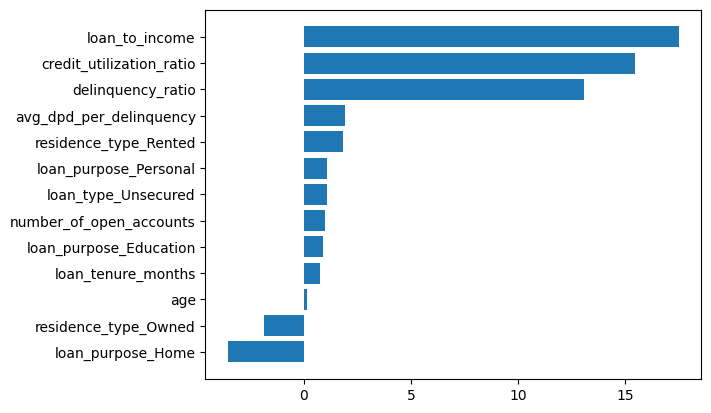

In [90]:
final_model = best_model_logistic

feature_importance = final_model.coef_[0]

coef_df = pd.DataFrame(feature_importance, index=Xtrain_encoded.columns, columns=['Coefficients'])
coef_df = coef_df.sort_values(by='Coefficients', ascending=True)

plt.barh(coef_df.index, coef_df['Coefficients'])
plt.show()


In [91]:
print(Xtest_encoded.head(1))


         age  loan_tenure_months  number_of_open_accounts  credit_utilization_ratio  loan_to_income  delinquency_ratio  avg_dpd_per_delinquency  residence_type_Owned  residence_type_Rented  loan_purpose_Education  loan_purpose_Home  loan_purpose_Personal  loan_type_Unsecured
33553  0.346               0.528                    0.333                     0.121           0.258              0.043                    0.900                     1                      0                       1                  0                      0                    0


In [92]:
print(Xtest_encoded.columns)

Index(['age', 'loan_tenure_months', 'number_of_open_accounts', 'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency', 'residence_type_Owned', 'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal', 'loan_type_Unsecured'], dtype='object')


In [ ]:
print(cols_to_scale)

Index(['age', 'number_of_dependants', 'years_at_current_address', 'sanction_amount', 'processing_fee', 'gst', 'net_disbursement', 'loan_tenure_months', 'principal_outstanding', 'bank_balance_at_application', 'number_of_open_accounts', 'number_of_closed_accounts', 'enquiry_count', 'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency'], dtype='object')


In [99]:
print(Xtrain_encoded.columns)

Index(['age', 'loan_tenure_months', 'number_of_open_accounts', 'credit_utilization_ratio', 'loan_to_income', 'delinquency_ratio', 'avg_dpd_per_delinquency', 'residence_type_Owned', 'residence_type_Rented', 'loan_purpose_Education', 'loan_purpose_Home', 'loan_purpose_Personal', 'loan_type_Unsecured'], dtype='object')


In [101]:
print(final_model.coef_,final_model.intercept_)

[[ 0.16707635  0.77271019  1.00045615 15.44118834 17.49819166 13.07711024
   1.91506264 -1.82961093  1.82495826  0.87908745 -3.52708224  1.10607712
   1.10607712]] [-20.30311916]


In [103]:
from joblib import dump
model_data = {
    'model':final_model,
    'features':Xtrain_encoded.columns,
    'scaler':scaler,
    'cols_to_scale':cols_to_scale
}

dump(model_data,'ARTIFACTS/model_data.joblib')

['ARTIFACTS/model_data.joblib']